In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [48]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [49]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 10
)

In [50]:
dataset = pd.read_csv("csv/insurance.csv")
dataset.dropna(inplace=True)
# Change a column values to not be categorical
dataset['region'] = dataset['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
dataset['sex'] = dataset['sex'].map({'male':0, 'female':1})
dataset['smoker'] = dataset['smoker'].map({'yes':1, 'no':0})
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [51]:
tester = tester(X, y, generator, 10, 2, 500, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.7759413394940258 Generation best 0.7696543285408382
Split:  1 Feature:  1
Iteration:  199 Best fitness:  0.11907881820630706 Generation best 0.08171287946927952
Split:  0 Feature:  2
Iteration:  199 Best fitness:  0.7634768951206038 Generation best 0.7244946877725175
Split:  1 Feature:  3
Iteration:  199 Best fitness:  0.14462408057601261 Generation best 0.13280340420869049
Split:  0 Feature:  4
Iteration:  199 Best fitness:  0.743944699871703 Generation best 0.7117836939499504
Split:  1 Feature:  5
Iteration:  199 Best fitness:  0.11699684508019703 Generation best 0.09935486227473822
Split:  0 Feature:  6
Iteration:  199 Best fitness:  0.7653945019472841 Generation best 0.7385069147989024
Split:  1 Feature:  7
Iteration:  199 Best fitness:  0.12625614661473905 Generation best 0.11183300383977934
Split:  0 Feature:  8
Iteration:  199 Best fitness:  0.7658465092707158 Generation best 0.7529985435319578
Split:  1 Feature:  9
Iteratio

In [52]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

9
10
7
10
10
7
8
3
6
10


In [53]:
tester.test_models(notests=20)

Iteration 4 - MSE 17188733.109110873, R2 0.859002747641527, MAE 2378.5723561080104, NEW_MSE 18275563.24122333, NEW_R2 0.8500876018052682, NEW_MAE 2428.07325063211
Iteration 9 - MSE 17188733.109110873, R2 0.859002747641527, MAE 2378.5723561080104, NEW_MSE 18275563.24122333, NEW_R2 0.8500876018052682, NEW_MAE 2428.07325063211
Iteration 14 - MSE 17188733.109110873, R2 0.859002747641527, MAE 2378.5723561080104, NEW_MSE 18275563.24122333, NEW_R2 0.8500876018052682, NEW_MAE 2428.07325063211
Iteration 19 - MSE 17188733.109110873, R2 0.859002747641527, MAE 2378.5723561080104, NEW_MSE 18275563.24122333, NEW_R2 0.8500876018052682, NEW_MAE 2428.07325063211
Iteration 4 - MSE 32325867.963852677, R2 0.7348345259610712, MAE 4070.8028539206475, NEW_MSE 21562665.838448122, NEW_R2 0.8231238673934846, NEW_MAE 3055.3556843813376
Iteration 9 - MSE 32294533.850368015, R2 0.7350915561842053, MAE 4051.4945213772085, NEW_MSE 22228442.88868424, NEW_R2 0.8176625728250755, NEW_MAE 3196.0564501872186
Iteration 14 

In [54]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,1.718873e+07,0.859003,2378.572356,1.827556e+07,0.850088,2428.073251
1,SGDRegressor,3.227118e+07,0.735283,4048.138019,2.237068e+07,0.816496,3148.044034
2,GradientBoostingRegressor,2.770086e+07,0.772773,2834.242216,2.084089e+07,0.829045,2268.808887


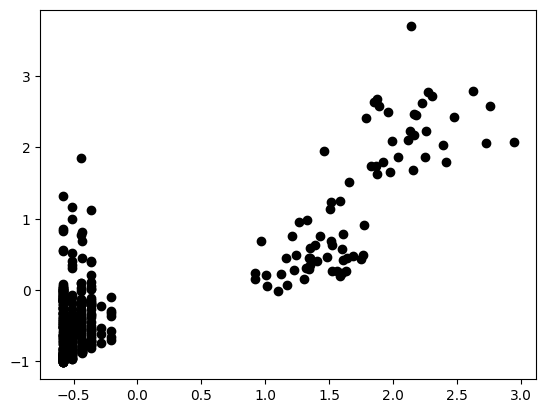

Min:  -0.5841224484050695 Max:  2.944045390839218 Mean:  -0.08663567362923574 Std:  0.8968059933732463


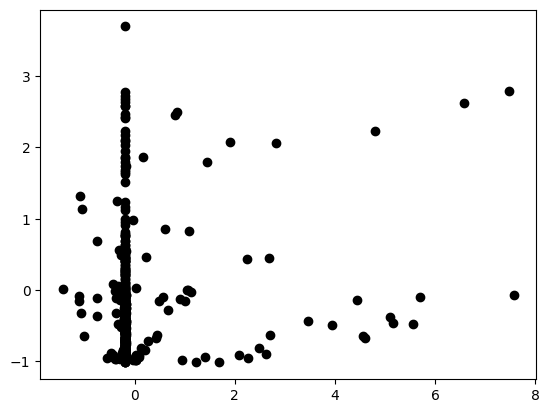

Min:  -1.434367694140295 Max:  7.565738295531398 Mean:  0.07957416406554345 Std:  1.0924752718048047


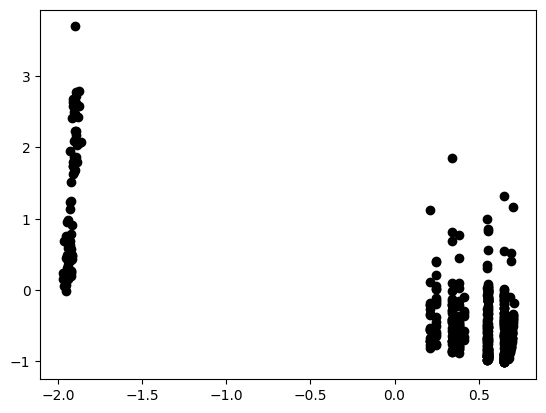

Min:  -1.972049156069862 Max:  0.7083900699280878 Mean:  0.05764910055839254 Std:  0.9651677688175512


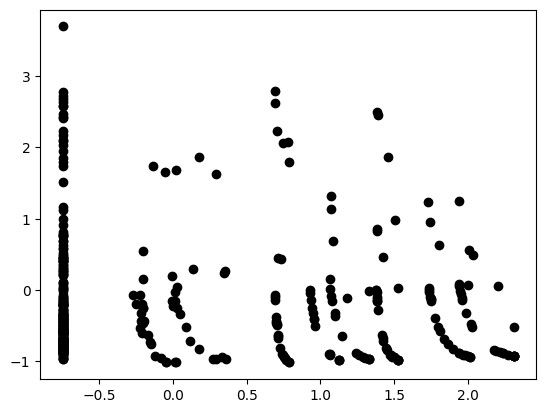

Min:  -0.748541587570101 Max:  2.3122739111610304 Mean:  0.08367988995306291 Std:  1.0391633743937023


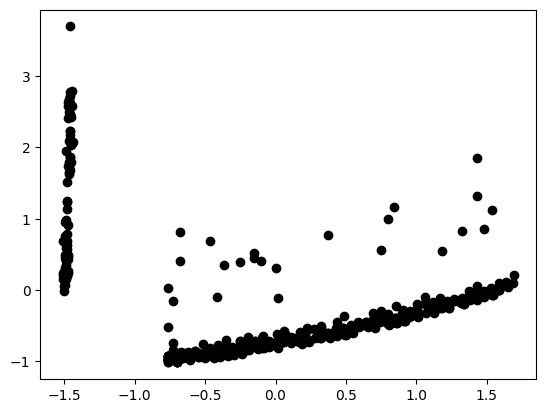

Min:  -1.5118898592050678 Max:  1.6921829070130348 Mean:  -0.0015783201316441223 Std:  0.9882994578667954


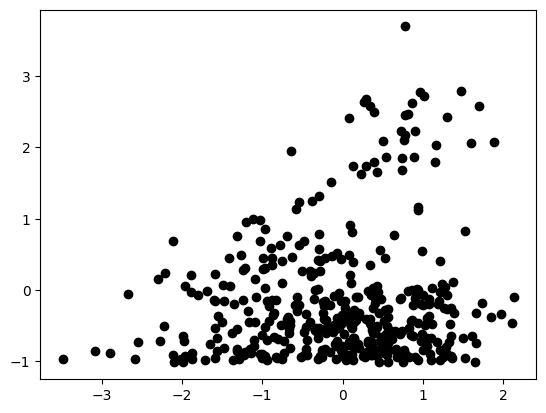

Min:  -3.4838735214274186 Max:  2.1315093955292066 Mean:  -0.045746583093313 Std:  0.9980134309237892


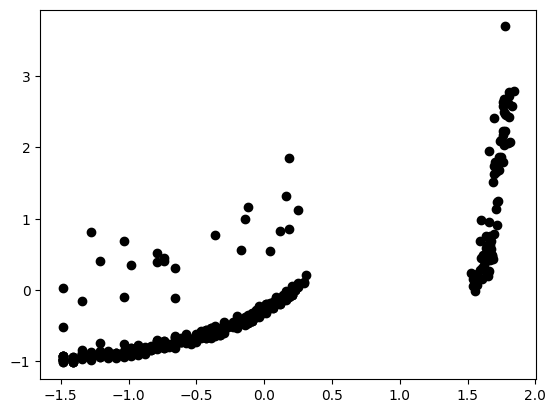

Min:  -1.4856099102889164 Max:  1.8401594107520427 Mean:  -0.09048348413808277 Std:  0.9907506079617374


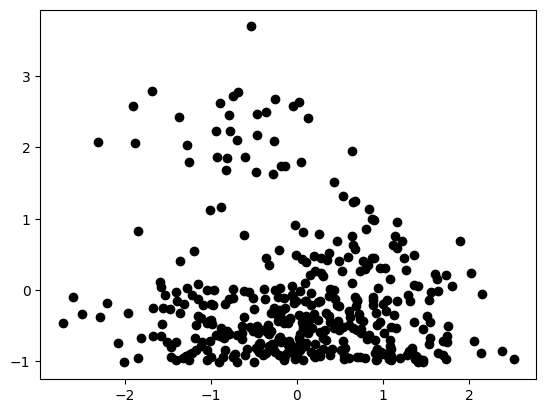

Min:  -2.7176836274949294 Max:  2.5167257657612807 Mean:  0.02531509665917858 Std:  0.9650831752703133


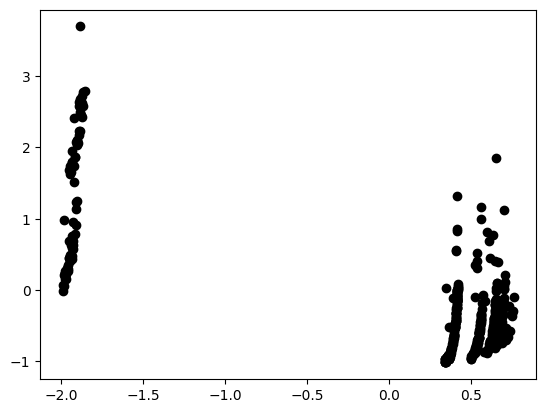

Min:  -1.9896274217878043 Max:  0.7574340645744613 Mean:  0.04432072997352417 Std:  0.9590833080270788


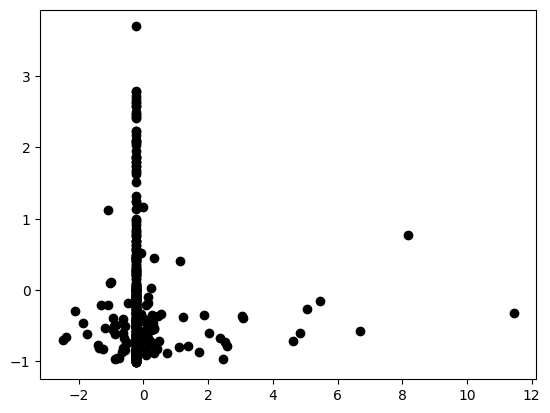

Min:  -2.49123559543529 Max:  11.442559382401567 Mean:  -0.05728263712656723 Std:  1.0746356288871728


In [55]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())